In [137]:
import numpy as np
import keras 
from skimage.transform import resize
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import matplotlib.pyplot as plt
from IPython.display import Image

In [3]:
model = VGG16(weights="imagenet")

553467904/553467096 [==============================] - 143s 0us/step


In [95]:
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [221]:
img_1_initial = load_img("pizza.jpg", target_size=(224, 224))
img_1 = img_to_array(img_1_initial)
img_1 = img_1.reshape((1, img_1.shape[0], img_1.shape[1], img_1.shape[2]))
img_1 = preprocess_input(img_1)

In [222]:
predict = model.predict(img_1)
decode_predictions(predict)

[[('n07873807', 'pizza', 0.991413),
  ('n07716358', 'zucchini', 0.0027049598),
  ('n07579787', 'plate', 0.0013902484),
  ('n04270147', 'spatula', 0.0006260666),
  ('n07714990', 'broccoli', 0.00033620984)]]

In [228]:
last_layer = model.get_layer('fc2')
grads = keras.backend.gradients(model.output[:,999],last_conv.output)[0]
grads

<tf.Tensor 'gradients_14/block5_pool/MaxPool_grad/MaxPoolGrad:0' shape=(None, 14, 14, 512) dtype=float32>

In [229]:
pooled_grads = keras.backend.mean(grads,axis=(0,1,2))
iterate = keras.backend.function([model.input],[pooled_grads,last_conv.output[0]])
pooled_grads_value,conv_layer_output = iterate([img_1])

In [230]:
for i in range(512):
    conv_layer_output[:,:,i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output,axis=-1)

In [231]:
heatmap_resized = resize(heatmap, (224,224), preserve_range=True)

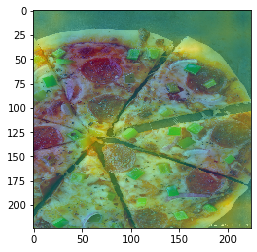

In [232]:
plt.imshow(heatmap_resized)
plt.imshow(img_1_initial, alpha=0.5)